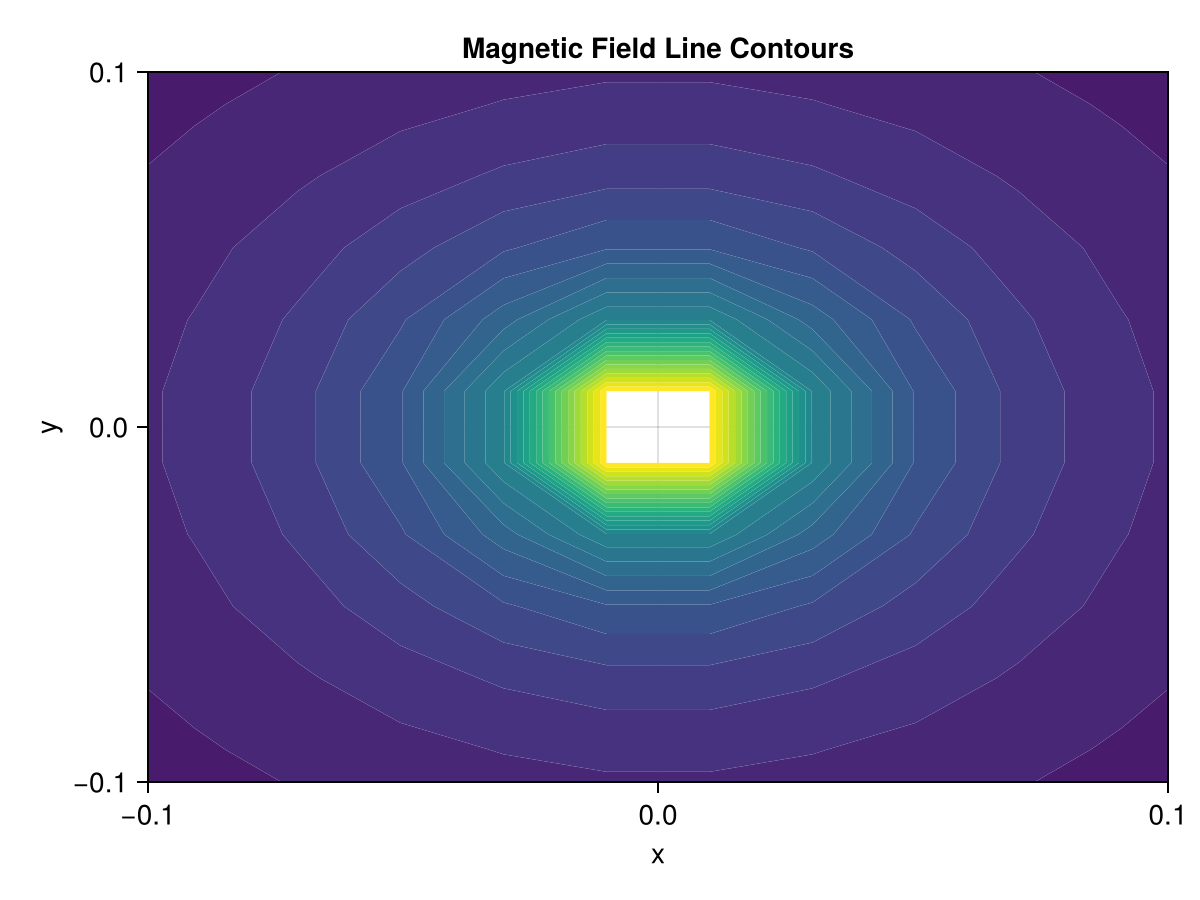

In [117]:
using LinearAlgebra
using CairoMakie

# Precompute constants
μ0 = 4 * π * 1.0e-7
Current = 5  # Amps
L = 0.5  # meters
dl = 0.01  # meters
r = 0.1  # meters

# Define the grid in the x-y plane
domain = (-1, 1)
n = 100
x_range = range(domain[1], domain[2], length = n)
y_range = range(domain[1], domain[2], length = n)

Bx = zeros(n, n)
By = zeros(n, n)

function biot_savart_wire(Current, L, dl, r)
    B = zeros(3)  # Initialize the magnetic field vector
    for z in (-L / 2):dl:(L / 2)
        dl_vec = [0.0, 0.0, dl]
        r_vec = r .- [0.0, 0.0, z]
        dB = (μ0 / (4 * π)) * Current * cross(dl_vec, r_vec) / norm(r_vec)^3
        B += dB
    end
    return B
end

# Vectorize the loop to calculate the magnetic field for all grid points
for i in 1:n
    for j in 1:n
        grid = [x_range[i], y_range[j], 0.0]  # Point in the x-y plane
        B = biot_savart_wire(Current, L, dl, grid)
        Bx[i, j] = B[1]  # x-component of B
        By[i, j] = B[2]  # y-component of B
    end
end

# Calculate the magnitude or specific component to plot
B_magnitude = sqrt.(Bx .^ 2 .+ By .^ 2)
B_mag_norm = B_magnitude / maximum(B_magnitude)

# Create a contour plot for visualization
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", title = "Magnetic Field Line Contours")
contourf!(ax, x_range, y_range, B_mag_norm, levels = range(0, stop = 1, length = 30))
limits!(ax, -r, r, -r, r)

# Show the plot
fig
